# Проверка результатов

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#file1---результат-выполнения-первой-задачи" data-toc-modified-id="file1---результат-выполнения-первой-задачи-1"><code>file1</code> - результат выполнения первой задачи</a></span></li><li><span><a href="#file2---файл-для-соединения-с-file1" data-toc-modified-id="file2---файл-для-соединения-с-file1-2"><code>file2</code> - файл для соединения с file1</a></span></li><li><span><a href="#Удалим-дубли-пар-клиент-телефон-из-file2" data-toc-modified-id="Удалим-дубли-пар-клиент-телефон-из-file2-3">Удалим дубли пар клиент-телефон из <code>file2</code></a></span></li><li><span><a href="#Объединим-файлы,-посмотрим-объём-пересечения." data-toc-modified-id="Объединим-файлы,-посмотрим-объём-пересечения.-4">Объединим файлы, посмотрим объём пересечения.</a></span></li><li><span><a href="#Что-совпало" data-toc-modified-id="Что-совпало-5">Что совпало</a></span></li><li><span><a href="#Картинки" data-toc-modified-id="Картинки-6">Картинки</a></span></li><li><span><a href="#Выводим-таблицы" data-toc-modified-id="Выводим-таблицы-7">Выводим таблицы</a></span></li></ul></div>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib_venn import venn2

%matplotlib inline
plt.style.use('ggplot')

#### `file1` - результат выполнения первой задачи

In [2]:
file1 = pd.read_csv('file1.csv')

In [3]:
print(f'Всего пар клиент-телефон в file1: {len(file1)}')

Всего пар клиент-телефон в file1: 1112


In [4]:
print(f"Уникальных клиентов в file1: {file1['EXT_NUMBER'].nunique()}")

Уникальных клиентов в file1: 923


#### `file2` - файл для соединения с file1

In [5]:
file2 = pd.read_csv('file2.csv')

In [6]:
print(f'Всего пар клиент-телефон в file2: {len(file2)}')

Всего пар клиент-телефон в file2: 5657


In [7]:
print(f"Уникальных клиентов в file2: {file2['EXT_NUMBER'].nunique()}")

Уникальных клиентов в file2: 1917


#### Удалим дубли пар клиент-телефон из `file2`

In [8]:
file2_duplicated = file2.copy()
file2 = file2.drop_duplicates()

In [9]:
print(f'Всего пар клиент-телефон в file2 после удаления дублей: {len(file2)}')

Всего пар клиент-телефон в file2 после удаления дублей: 2355


In [10]:
print(f"Уникальных клиентов в file2 после удаления дублей: {file2['EXT_NUMBER'].nunique()}")

Уникальных клиентов в file2 после удаления дублей: 1917


#### Объединим файлы, посмотрим объём пересечения.

In [11]:
file1['file1'] = 1
file2['file2'] = 1

df = pd.merge(file1, file2, on=['EXT_NUMBER', 'PHONE'], how='outer')

df['file1'] = df['file1'].fillna(0).astype(int)
df['file2'] = df['file2'].fillna(0).astype(int)
df['intersect'] = df['file1'] == df['file2']

In [12]:
print(f'Всего пар клиент-телефон после объединения: {len(df)}')

Всего пар клиент-телефон после объединения: 3200


In [13]:
print(f"Уникальных клиентов после объединения: {df['EXT_NUMBER'].nunique()}")

Уникальных клиентов после объединения: 2496


#### Что совпало

In [14]:
intersect = df.loc[df['intersect']]

In [15]:
print(f'Всего пар клиент-телефон в пересечении: {len(intersect)}')

Всего пар клиент-телефон в пересечении: 267


In [16]:
print(f"Уникальных клиентов в пересечении: {intersect['EXT_NUMBER'].nunique()}")

Уникальных клиентов в пересечении: 253


#### Картинки

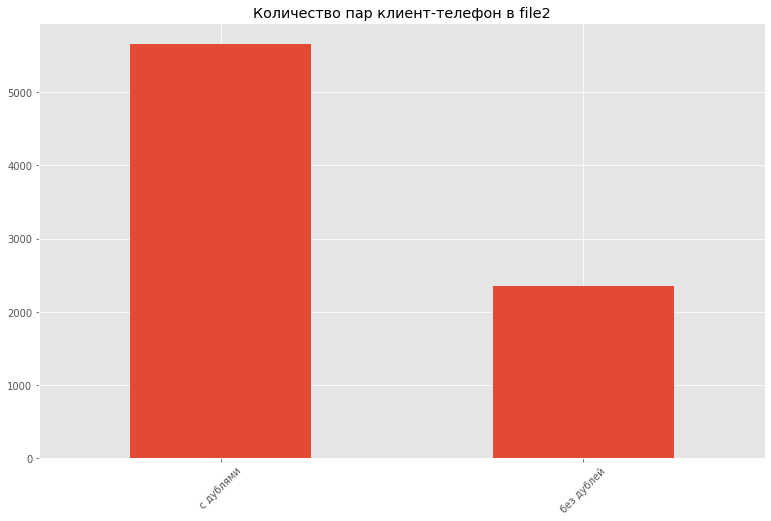

In [18]:
pd.Series({
    'с дублями': len(file2_duplicated),
    'без дублей': len(file2)
}).plot.bar(title='Количество пар клиент-телефон в file2', rot=45, figsize=(13,8));

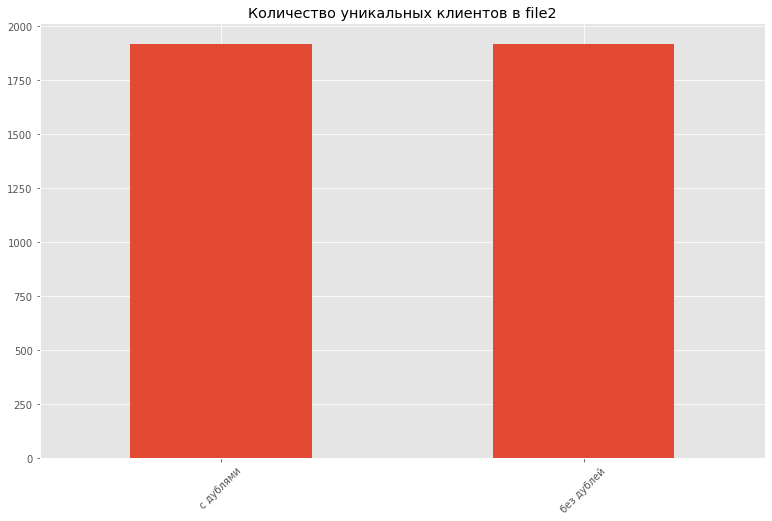

In [19]:
pd.Series({
    'с дублями': file2_duplicated['EXT_NUMBER'].nunique(),
    'без дублей': file2['EXT_NUMBER'].nunique()
}).plot.bar(title='Количество уникальных клиентов в file2', rot=45, figsize=(13,8));

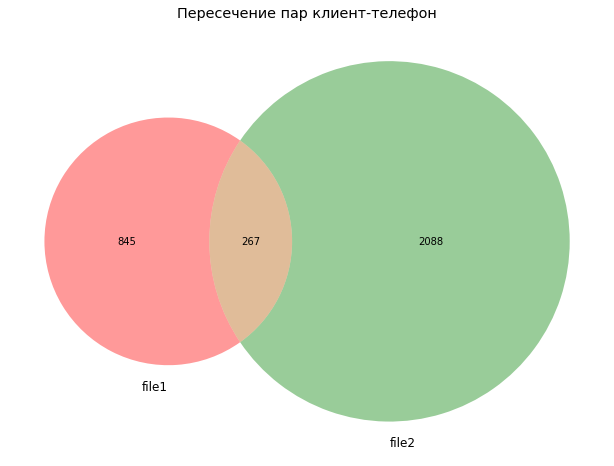

In [20]:
f, ax = plt.subplots(1,1)
ax.set_title("Пересечение пар клиент-телефон")
venn2((set(file1['EXT_NUMBER']+file1['PHONE']), set(file2['EXT_NUMBER']+file2['PHONE'])),
      set_labels=('file1', 'file2'), ax=ax)
f.set_size_inches(13,8)
plt.show();

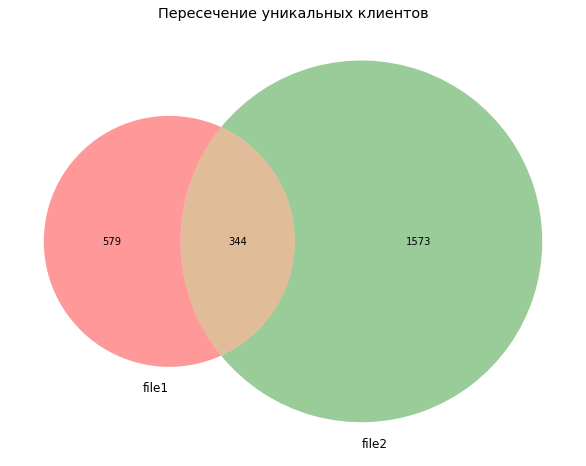

In [21]:
f, ax = plt.subplots(1,1)
ax.set_title("Пересечение уникальных клиентов")
venn2((set(file1['EXT_NUMBER']), set(file2['EXT_NUMBER'])),
      set_labels=('file1', 'file2'), ax=ax)
f.set_size_inches(13,8)
plt.show();

#### Выводим таблицы

In [17]:
with pd.ExcelWriter('output.xlsx') as writer:  
    file2_duplicated.to_excel(writer, sheet_name='file2_duplicated')
    df.to_excel(writer, sheet_name='result')